In [2]:
import feets
import os 
import math 
import numpy as np 
import argparse 
from astropy.table import Table, Column, join
from astropy.coordinates import SkyCoord
from astropy import units as u
from astroquery.vizier import Vizier
import sys
import hdbscan
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
fft = False
import pickle
import matplotlib.pylab as pylab
from astropy.table import Table, Column, join 
import glob

In [3]:
## get light curves 

## folder - LC_set1_files (columns: hjd, mag, emag)
## folder - LC_set2_files (columns: mjd, mag, emag, uplim)
path = 'PATH/LC_set1_files/'


In [4]:
file_list = os.listdir(path)
file_list       

['exampledata_66.ascii',
 'exampledata_23.ascii',
 'exampledata_42.ascii',
 'exampledata_3.ascii',
 'exampledata_38.ascii',
 'exampledata_1.ascii',
 'exampledata_40.ascii',
 'exampledata_64.ascii',
 'exampledata_21.ascii',
 'exampledata_59.ascii',
 'exampledata_60.ascii',
 'exampledata_25.ascii',
 'exampledata_18.ascii',
 'exampledata_5.ascii',
 'exampledata_44.ascii',
 'exampledata_46.ascii',
 'exampledata_7.ascii',
 'exampledata_62.ascii',
 'exampledata_27.ascii',
 'exampledata_41.ascii',
 'exampledata_39.ascii',
 'exampledata_58.ascii',
 'exampledata_20.ascii',
 'exampledata_65.ascii',
 'exampledata_22.ascii',
 'exampledata_67.ascii',
 'exampledata_2.ascii',
 'exampledata_43.ascii',
 'exampledata_6.ascii',
 'exampledata_47.ascii',
 'exampledata_26.ascii',
 'exampledata_63.ascii',
 'exampledata_19.ascii',
 'exampledata_24.ascii',
 'exampledata_61.ascii',
 'exampledata_45.ascii',
 'exampledata_4.ascii',
 'exampledata_8.ascii',
 'exampledata_31.ascii',
 'exampledata_49.ascii',
 'exampl

exampledata_60.ascii


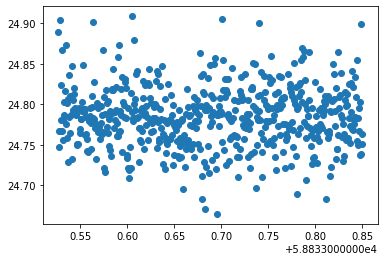

In [5]:
## list at a test lightcurve 

print(file_list[10])

hjd, mag, emag = np.loadtxt(path+file_list[10], unpack = True, skiprows=1)
plt.scatter(hjd, mag)
         

# What features do you think could describe the light curves for ML? 

Papers to consider reading: 

https://ui.adsabs.harvard.edu/abs/2021MNRAS.506.2089W/abstract 
https://ui.adsabs.harvard.edu/abs/2011ApJ...735...68K/abstract 
https://ui.adsabs.harvard.edu/abs/2016A%26A...587A..18K/abstract
https://ui.adsabs.harvard.edu/abs/2015arXiv150600010N/abstract
https://ui.adsabs.harvard.edu/abs/2013ApJ...777...83P/abstract

Types of features which have been used for light curves: 

Autocor_length,
Beyond1Std,
CAR_sigma, 
CAR_mean, 
CAR_tau, 
Con, 
Eta_e, 
LinearTrend,
MaxSlope, 
Mean, 
Meanvariance, 
MedianAbsDev, 
MedianBRP, 
PairSlopeTrend, 
PercentAmplitude, 
Q31, 
Rcs,
Skew, 
SlottedA_length,
SmallKurtosis,
Std, 
StetsonK_AC, 
Amplitudes, 
VariabilityIndex, 
hl_ratio,
amp1_val,
amp_2_1_ratio,
amp_3_1_ratio, 
phase_2_1_ratio, 
phase_3_1_ratio, 


In [7]:
used_lcs = []
filenames = []
  
Autocor_length = []
Beyond1Std = []
CAR_sigma = []
CAR_mean = []
CAR_tau =[]
Con =[]
Eta_e = []
LinearTrend = []
MaxSlope =[]
Mean = []
Meanvariance = []
MedianAbsDev =[]
MedianBRP =[]
PairSlopeTrend =[]
PercentAmplitude =[]
Q31 =[]
Rcs =[]
Skew =[]
SlottedA_length =[]
SmallKurtosis =[]
Std = []
StetsonK_AC = []


for filename in file_list: 
        if filename.endswith('.ascii'):
            try:
                hjd, mag, emag = np.loadtxt(path + filename, unpack = True, skiprows=1)
            except: 
                print('FILE EMPTY)')
            sum_mag = np.sum(mag)
            # We don't won't to work with light curves with no values so we 
            # should filter them out before we get the features
            if sum_mag == 0:
                lc_with_only_zeros.append(filename)
            elif sum_mag != 0:
                used_lcs.append(filename)
            clean_hjd = []
            clean_mag = []
            clean_emag = []
            # Now we want to clean the light curves to remove any none numbers (someones nan's will be in the data)
            for l,m,n in zip(hjd,mag, emag):
                if m != 0:
                    if m != 0:
                        clean_hjd.append(l)
                        clean_mag.append(m)
                        clean_emag.append(n)
                    elif m != float: 
                        pass 
                    
            # ---  The feets package needs at least 3 data points  
            if len(clean_hjd) > 3:
                lc = np.array([clean_mag, clean_hjd, clean_emag])
                fs=feets.FeatureSpace(only=['Autocor_length', 'Beyond1Std', 'CAR_sigma', 'CAR_mean',
                                            'CAR_tau', 'Con', 'LinearTrend', 'MaxSlope',
                                            'Mean', 'Meanvariance', 'MedianAbsDev', 'MedianBRP',
                                            'PairSlopeTrend', 'PercentAmplitude', 'Q31', 'Rcs', 'Skew',
                                            'SlottedA_length', 'SmallKurtosis', 'Std',
                                            'StetsonK_AC' ])
                
                features, values = fs.extract(*lc)
                print(features, values)
                results = dict(zip(features,values))
                print(results['Autocor_length'])
                filenames.append(filename)
                Autocor_length.append(results['Autocor_length'])
                Beyond1Std.append(results['Beyond1Std'])
                CAR_sigma.append(results['CAR_sigma'])
                CAR_mean.append(results['CAR_mean'])
                CAR_tau.append(results['CAR_tau'])
                Con.append(results['Con'])
                LinearTrend.append(results['LinearTrend'])
                MaxSlope.append(results['MaxSlope'])
                Mean.append(results['Mean'])
                Meanvariance.append(results['Meanvariance'])
                MedianAbsDev.append(results['MedianAbsDev'])
                MedianBRP.append(results['MedianBRP'])
                PairSlopeTrend.append(results['PairSlopeTrend'])
                PercentAmplitude.append(results['PercentAmplitude'])
                Q31.append(results['Q31'])
                Rcs.append(results['Rcs'])
                Skew.append(results['Skew'])
                SlottedA_length.append(results['SlottedA_length'])
                SmallKurtosis.append(results['SmallKurtosis'])
                Std.append(results['Std'])
                StetsonK_AC.append(results['StetsonK_AC'])
                
                
            else: 
                print('Not enough data points')
    #put all into a mega table with each row representing a different light curve 
feature_table = Table()
feature_table['LC_name'] = filenames
feature_table['Autocor_length'] = Autocor_length
feature_table['Beyond1Std'] = Beyond1Std
feature_table['CAR_sigma'] = CAR_sigma
feature_table['CAR_mean'] = CAR_mean
feature_table['CAR_tau'] = CAR_tau
feature_table['Con'] = Con
feature_table['LinearTrend'] = LinearTrend
feature_table['MaxSlope'] = MaxSlope
feature_table['Mean'] =Mean
feature_table['Meanvariance'] =Meanvariance
feature_table['MedianAbsDev'] =MedianAbsDev
feature_table['MedianBRP'] =MedianBRP
feature_table['PairSlopeTrend'] =PairSlopeTrend
feature_table['PercentAmplitude'] =PercentAmplitude
feature_table['Q31'] =Q31
feature_table['Rcs'] =Rcs
feature_table['Skew'] =Skew
feature_table['SlottedA_length'] =SlottedA_length
feature_table['SmallKurtosis'] =SmallKurtosis
feature_table['Std'] =Std
feature_table['StetsonK_AC'] =StetsonK_AC
output =path+'/features_set.csv'
df = feature_table.to_pandas()
df = df.replace(np.nan, 0)
df.to_csv(output)


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.12280702e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -2.19368740e-01             inf
  5.88336882e+04  1.59349126e-06  8.13110000e-02  1.98245614e-01
  9.66666667e-01  2.75752728e-06  1.62340750e-01  4.33347058e-01
  1.49098131e-03             nan -1.19727335e+00  9.37509679e-02
             nan]
125.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.22000000e+02  4.15467626e-01  1.17667375e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -2.94066711e-01             inf
  5.88336874e+04  1.59786859e-06  8.18815000e-02  1.90647482e-01
  9.66666667e-01  2.75805417e-06  1.63447250e-01  4.34882434e-01
  3.29451879e-03             nan -1.21192043e+00  9.40085009e-02
             nan]
122.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.03169014e-01  1.17667378e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -4.36008074e-01  2.43222000e+05
  5.88336888e+04  1.58922163e-06  8.10295000e-02  1.98943662e-01
  9.66666667e-01  2.75805417e-06  1.61779000e-01  4.33242183e-01
 -1.15181956e-03             nan -1.19403865e+00  9.34997710e-02
             nan]
124.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, 

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.22807018e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -6.92059852e-01             inf
  5.88336882e+04  1.59349126e-06  8.13110000e-02  1.98245614e-01
  9.66666667e-01  2.75752728e-06  1.62340750e-01  4.33347058e-01
  1.49098131e-03             nan -1.19727335e+00  9.37509679e-02
             nan]
125.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.03508772e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -4.13297050e-01             inf
  5.88336882e+04  1.59349126e-06  8.13110000e-02  1.98245614e-01
  9.66666667e-01  2.75752728e-06  1.62340750e-01  4.33347058e-01
  1.49098131e-03             nan -1.19727335e+00  9.37509679e-02
             nan]
125.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.22807018e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -9.76935954e-01             inf
  5.88336882e+04  1.59349126e-06  8.13110000e-02  1.98245614e-01
  9.66666667e-01  2.75752728e-06  1.62340750e-01  4.33347058e-01
  1.49098131e-03             nan -1.19727335e+00  9.37509679e-02
             nan]
125.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.04929577e-01  1.17667377e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -3.86032198e-01             inf
  5.88336886e+04  1.59337103e-06  8.10295000e-02  1.98943662e-01
  9.66666667e-01  2.75805417e-06  1.61779000e-01  4.33109238e-01
 -5.54018958e-03             nan -1.19414677e+00  9.37438948e-02
             nan]
124.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.22000000e+02  4.12500000e-01  1.17667380e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -1.23572937e-01             inf
  5.88336898e+04  1.59349440e-06  8.10295000e-02  2.01785714e-01
  9.66666667e-01  2.79674788e-06  1.61770750e-01  4.32513494e-01
 -2.99680559e-02             nan -1.18686295e+00  9.37511555e-02
             nan]
122.0
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.20000000e+02  4.11657559e-01  1.17667379e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  1.32437817e-01  2.77338000e+05
  5.883

/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/swebb/op

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.07732865e-01  1.17667377e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -5.06791796e-01             inf
  5.88336883e+04  1.59488473e-06  8.14890000e-02  1.96836555e-01
  9.66666667e-01  2.75325251e-06  1.62622000e-01  4.33671001e-01
  1.14062408e-03             nan -1.20042521e+00  9.38329508e-02
             nan]
125.0
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.01754386e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -2.49708161e-02  1.49363000e+05
  5.883

/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.03508772e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  9.53345905e-01             inf
  5.88336882e+04  1.59349126e-06  8.13110000e-02  1.98245614e-01
  9.66666667e-01  2.75752728e-06  1.62340750e-01  4.33347058e-01
  1.49098131e-03             nan -1.19727335e+00  9.37509679e-02
             nan]
125.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.20774648e-01  1.17667377e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  4.08919309e-02  2.64286000e+05
  5.88336886e+04  1.59318694e-06  8.10295000e-02  1.98943662e-01
  9.66666667e-01  2.75805417e-06  1.61779000e-01  4.33106005e-01
 -5.48602979e-03  1.00000000e+00 -1.19385188e+00  9.37330642e-02
  1.00000000e+00]
124.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.21052632e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  1.67060589e+00  4.38760000e+04
  5.88336882e+04  1.59349126e-06  8.13110000e-02  1.98245614e-01
  9.66666667e-01  2.75752728e-06  1.62340750e-01  4.33347058e-01
  1.49098131e-03             nan -1.19727335e+00  9.37509679e-02
             nan]
125.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.03000000e+02  4.17355372e-01  1.17667393e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -5.17954248e-02  1.50284500e+05
  5.88336963e+04  1.55792482e-06  7.61815000e-02  2.31404959e-01
  9.66666667e-01  2.92962203e-06  1.52798500e-01  4.27139260e-01
 -8.25497006e-02  1.00000000e+00 -1.12034803e+00  9.16584757e-02
  8.46938315e-01]
103.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.00702988e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -1.48655575e-01             inf
  5.88336881e+04  1.59386763e-06  8.14740000e-02  1.98594025e-01
  9.66666667e-01  2.76236296e-06  1.62622000e-01  4.33254262e-01
  4.90077104e-03             nan -1.19671692e+00  9.37731107e-02
             nan]
124.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.11000000e+02  4.10714286e-01  1.17667399e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -8.71292959e-02             inf
  5.88336993e+04  1.50617530e-06  7.59115000e-02  1.90476190e-01
  9.66666667e-01  2.72337980e-06  1.51532250e-01  4.34393127e-01
 -2.29807668e-02  1.00000000e+00 -1.17220216e+00  8.86138644e-02
  1.00000000e+00]
111.0
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.10526316e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -4.35204264e-01  2.63104000e+05
  5.883

/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 9.60000000e+01  4.23076923e-01  1.17667402e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -1.07089615e+00  2.71890000e+04
  5.88337011e+04  1.61008936e-06  8.04370000e-02  1.92307692e-01
  9.66666667e-01  3.05569735e-06  1.61443000e-01  4.32904082e-01
 -1.83040679e-01             nan -1.18534713e+00  9.47275163e-02
             nan]
96.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.23000000e+02  4.06749556e-01  1.17667379e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -1.18487861e-01  1.24707000e+05
  5.88336897e+04  1.58700004e-06  8.05740000e-02  2.00710480e-01
  9.66666667e-01  2.78214744e-06  1.60916500e-01  4.32737972e-01
 -1.62818821e-02             nan -1.18706500e+00  9.33690681e-02
  1.00000000e+00]
123.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.23000000e+02  4.10301954e-01  1.17667378e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.31088936e-01  1.24707000e+05
  5.88336889e+04  1.59811958e-06  8.17030000e-02  1.97158082e-01
  9.66666667e-01  2.77259511e-06  1.63195500e-01  4.33674889e-01
 -1.24282764e-02             nan -1.20253223e+00  9.40232700e-02
             nan]
123.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, 

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.11247803e-01  1.17667377e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -5.14125827e-01             inf
  5.88336884e+04  1.59415877e-06  8.14890000e-02  1.98594025e-01
  9.66666667e-01  2.75325251e-06  1.62622000e-01  4.33291460e-01
 -1.65446606e-03             nan -1.19760112e+00  9.37902402e-02
             nan]
124.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.20035149e-01  1.17667377e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -2.77587823e-01             inf
  5.88336883e+04  1.59488229e-06  8.14890000e-02  1.96836555e-01
  9.66666667e-01  2.75325251e-06  1.62622000e-01  4.33661100e-01
  1.07769273e-03  1.00000000e+00 -1.20041424e+00  9.38328075e-02
  1.00000000e+00]
125.0
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.14000000e+02  4.19047619e-01  1.17667385e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -2.61175731e-01  1.91647000e+05
  5.883

/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.04000000e+02  4.23799582e-01  1.17667396e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  4.79383671e-01  1.71080000e+04
  5.88336981e+04  1.60470277e-06  8.06530000e-02  2.00417537e-01
  9.66666667e-01  3.02185631e-06  1.60916500e-01  4.32564817e-01
 -1.50551102e-01  1.00000000e+00 -1.17488027e+00  9.44105983e-02
  1.00000000e+00]
104.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.06690141e-01  1.17667377e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  3.09184019e-01             inf
  5.88336883e+04  1.59225636e-06  8.10300000e-02  1.98943662e-01
  9.66666667e-01  2.75752728e-06  1.61778250e-01  4.33101508e-01
  1.90337892e-03             nan -1.19275253e+00  9.36783142e-02
             nan]
124.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.21052632e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -1.97815977e+00             inf
  5.88336882e+04  1.59349126e-06  8.13110000e-02  1.98245614e-01
  9.66666667e-01  2.75752728e-06  1.62340750e-01  4.33347058e-01
  1.49098131e-03             nan -1.19727335e+00  9.37509679e-02
             nan]
125.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.08771930e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  3.42957477e-01             inf
  5.88336882e+04  1.59349126e-06  8.13110000e-02  1.98245614e-01
  9.66666667e-01  2.75752728e-06  1.62340750e-01  4.33347058e-01
  1.49098131e-03             nan -1.19727335e+00  9.37509679e-02
             nan]
125.0
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.22807018e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  1.30735118e+00  6.26919999e+04
  5.883

/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.10526316e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -8.72096338e-02             inf
  5.88336882e+04  1.59349126e-06  8.13110000e-02  1.98245614e-01
  9.66666667e-01  2.75752728e-06  1.62340750e-01  4.33347058e-01
  1.49098131e-03             nan -1.19727335e+00  9.37509679e-02
             nan]
125.0
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.22807018e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -4.19481983e-01  8.26000000e+03
  5.883

/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, 

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.16666667e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -6.21022533e-01             inf
  5.88336882e+04  1.60173895e-06  8.21585000e-02  1.89716312e-01
  9.66666667e-01  2.75805417e-06  1.64027000e-01  4.35065900e-01
  2.04561018e-03             nan -1.21544744e+00  9.42362099e-02
             nan]
124.0
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.22807018e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -2.34304082e-01  3.96950000e+04
  5.883

/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, 

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.19298246e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  1.54568712e-01             inf
  5.88336882e+04  1.59349126e-06  8.13110000e-02  1.98245614e-01
  9.66666667e-01  2.75752728e-06  1.62340750e-01  4.33347058e-01
  1.49098131e-03             nan -1.19727335e+00  9.37509679e-02
             nan]
125.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 9.50000000e+01  4.23162584e-01  1.17667413e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -8.69022918e-02             inf
  5.88337064e+04  1.53013231e-06  7.22100000e-02  2.13808463e-01
  9.66666667e-01  3.09892062e-06  1.44908000e-01  4.27144878e-01
 -2.08780820e-01  2.00000000e+00 -1.05865122e+00  9.00233553e-02
  9.42643521e-01]
95.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.05263158e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -2.92508798e-01  2.22646000e+05
  5.88336882e+04  1.59349126e-06  8.13110000e-02  1.98245614e-01
  9.66666667e-01  2.75752728e-06  1.62340750e-01  4.33347058e-01
  1.49098131e-03             nan -1.19727335e+00  9.37509679e-02
             nan]
125.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.23550088e-01  1.17667377e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -3.88507510e-01             inf
  5.88336883e+04  1.59450030e-06  8.14890000e-02  1.98594025e-01
  9.66666667e-01  2.75325251e-06  1.62622000e-01  4.33369539e-01
 -1.03268930e-03             nan -1.19881226e+00  9.38103335e-02
             nan]
124.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.07017544e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  1.03561353e+00             inf
  5.88336882e+04  1.59349126e-06  8.13110000e-02  1.98245614e-01
  9.66666667e-01  2.75752728e-06  1.62340750e-01  4.33347058e-01
  1.49098131e-03             nan -1.19727335e+00  9.37509679e-02
             nan]
125.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.16520211e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -1.60200024e-01             inf
  5.88336882e+04  1.59488841e-06  8.14890000e-02  1.96836555e-01
  9.66666667e-01  2.75325251e-06  1.62622000e-01  4.33691296e-01
  1.26778284e-03  1.00000000e+00 -1.20044174e+00  9.38331674e-02
  1.00000000e+00]
125.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.10526316e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -1.54440818e-01             inf
  5.88336882e+04  1.59349126e-06  8.13110000e-02  1.98245614e-01
  9.66666667e-01  2.75752728e-06  1.62340750e-01  4.33347058e-01
  1.49098131e-03             nan -1.19727335e+00  9.37509679e-02
             nan]
125.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.07732865e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  1.15172185e+00  1.23207000e+05
  5.88336882e+04  1.59488765e-06  8.14890000e-02  1.96836555e-01
  9.66666667e-01  2.75325251e-06  1.62622000e-01  4.33686230e-01
  1.23627090e-03             nan -1.20043834e+00  9.38331228e-02
             nan]
125.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/swebb/op

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.03508772e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -3.59488838e-01             inf
  5.88336882e+04  1.59349126e-06  8.13110000e-02  1.98245614e-01
  9.66666667e-01  2.75752728e-06  1.62340750e-01  4.33347058e-01
  1.49098131e-03             nan -1.19727335e+00  9.37509679e-02
             nan]
125.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/swebb/op

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.14762742e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  4.88911215e-01             inf
  5.88336880e+04  1.59266143e-06  8.11400000e-02  1.98594025e-01
  9.66666667e-01  2.76236296e-06  1.62060000e-01  4.33224382e-01
  4.61897659e-03             nan -1.19475999e+00  9.37021459e-02
             nan]
124.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.23000000e+02  4.14285714e-01  1.17667378e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  4.23278436e-01  1.63668000e+05
  5.88336892e+04  1.59443714e-06  8.13110000e-02  1.96428571e-01
  9.66666667e-01  2.77737128e-06  1.62342250e-01  4.33816331e-01
 -7.94130676e-03             nan -1.20014759e+00  9.38066193e-02
             nan]
123.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, 

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.11971831e-01  1.17667377e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  6.40002273e-01             inf
  5.88336884e+04  1.59396160e-06  8.13110000e-02  1.97183099e-01
  9.66666667e-01  2.75752728e-06  1.62342000e-01  4.33515422e-01
 -9.57537223e-04             nan -1.19785966e+00  9.37786400e-02
             nan]
124.0
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.12280702e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -2.35885544e-02             inf
  5.883

/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.11247803e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  7.84885123e-01             inf
  5.88336880e+04  1.59184374e-06  8.11400000e-02  1.98594025e-01
  9.66666667e-01  2.76236296e-06  1.62060000e-01  4.33259225e-01
  3.63308566e-03             nan -1.19494439e+00  9.36540380e-02
             nan]
124.0
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.11247803e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -4.91974427e-01             inf
  5.883

/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.20494700e-01  1.17667377e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -4.87478988e-01             inf
  5.88336887e+04  1.59554775e-06  8.16000000e-02  1.97879859e-01
  9.66666667e-01  2.76772547e-06  1.62908000e-01  4.33450238e-01
 -8.34701706e-03             nan -1.19858697e+00  9.38719597e-02
             nan]
124.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.04929577e-01  1.17667377e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -3.60176544e-01             inf
  5.88336883e+04  1.59516885e-06  8.15880000e-02  1.97183099e-01
  9.66666667e-01  2.75752728e-06  1.62902750e-01  4.33390900e-01
 -1.92077937e-04             nan -1.19938753e+00  9.38496667e-02
             nan]
124.0
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.10526316e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -3.18575559e-02             inf
  5.883

/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.23000000e+02  4.15929204e-01  1.17667378e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  1.22520613e-02  1.62483000e+05
  5.88336892e+04  1.59074473e-06  8.05640000e-02  2.00000000e-01
  9.66666667e-01  2.77259511e-06  1.60915000e-01  4.32755511e-01
 -1.47178393e-02  1.00000000e+00 -1.18662306e+00  9.35893810e-02
  1.00000000e+00]
123.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, 

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.07732865e-01  1.17667377e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -1.52015505e-02             inf
  5.88336885e+04  1.59079499e-06  8.11330000e-02  1.98594025e-01
  9.66666667e-01  2.75325251e-06  1.62059000e-01  4.33341499e-01
  1.28670477e-03             nan -1.19701465e+00  9.35923372e-02
             nan]
124.0
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.05263158e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  6.11333255e-02             inf
  5.883

/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.15492958e-01  1.17667377e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  1.46380995e+00  5.46499999e+04
  5.88336887e+04  1.59132545e-06  8.10295000e-02  1.98943662e-01
  9.66666667e-01  2.75805417e-06  1.61779000e-01  4.33129819e-01
 -4.10824401e-03             nan -1.19246051e+00  9.36235463e-02
             nan]
124.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.11247803e-01  1.17667377e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -2.74402820e-01             inf
  5.88336884e+04  1.59350162e-06  8.11330000e-02  1.98594025e-01
  9.66666667e-01  2.75325251e-06  1.62059000e-01  4.33230910e-01
 -2.02126102e-03             nan -1.19586432e+00  9.37515776e-02
             nan]
124.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.21052632e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  1.12145859e+00             inf
  5.88336882e+04  1.59349126e-06  8.13110000e-02  1.98245614e-01
  9.66666667e-01  2.75752728e-06  1.62340750e-01  4.33347058e-01
  1.49098131e-03             nan -1.19727335e+00  9.37509679e-02
             nan]
125.0
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.04217926e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -2.53825639e-01  1.30126000e+05
  5.883

/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.10934744e-01  1.17667378e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -1.17392811e-01             inf
  5.88336888e+04  1.59270213e-06  8.09280000e-02  1.99294533e-01
  9.66666667e-01  2.76285582e-06  1.61489500e-01  4.32980657e-01
 -8.85040368e-03             nan -1.19164240e+00  9.37045415e-02
  1.00000000e+00]
124.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.22807018e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -3.16656076e-01  5.75062500e+03
  5.88336882e+04  1.59349126e-06  8.13110000e-02  1.98245614e-01
  9.66666667e-01  2.75752728e-06  1.62340750e-01  4.33347058e-01
  1.49098131e-03  1.00000000e+00 -1.19727335e+00  9.37509679e-02
  1.00000000e+00]
125.0
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.18277680e-01  1.17667377e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -1.01178243e+00  2.36008000e+05
  5.883

/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.07732865e-01  1.17667377e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -4.00682367e-01             inf
  5.88336885e+04  1.59228668e-06  8.11330000e-02  1.98594025e-01
  9.66666667e-01  2.75325251e-06  1.62059000e-01  4.33239143e-01
 -1.23633034e-03             nan -1.19472156e+00  9.36800987e-02
             nan]
124.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.14462081e-01  1.17667378e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -1.94209428e-01             inf
  5.88336888e+04  1.59253250e-06  8.09280000e-02  1.99294533e-01
  9.66666667e-01  2.76285582e-06  1.61489500e-01  4.32978729e-01
 -8.78538877e-03  1.00000000e+00 -1.19139714e+00  9.36945617e-02
  1.00000000e+00]
124.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 4.50000000e+01  4.22330097e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -3.32404534e-01  1.36053704e+03
  5.88336878e+04  1.58403331e-06  8.42595000e-02  2.08737864e-01
  9.66666667e-01  2.75321851e-06  1.67549500e-01  4.29111478e-01
 -1.02499100e-02  1.00000000e+00 -1.13654373e+00  9.31945213e-02
  1.00000000e+00]
45.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.05975395e-01  1.17667377e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -3.18941263e-04             inf
  5.88336884e+04  1.59285054e-06  8.11330000e-02  1.98594025e-01
  9.66666667e-01  2.75325251e-06  1.62059000e-01  4.33223022e-01
 -1.77879523e-03  1.00000000e+00 -1.19491719e+00  9.37132724e-02
  1.00000000e+00]
124.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.04929577e-01  1.17667378e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.65075523e-01  2.15543000e+05
  5.88336888e+04  1.58839111e-06  8.10295000e-02  1.98943662e-01
  9.66666667e-01  2.75805417e-06  1.61779000e-01  4.33309330e-01
  4.64571106e-04             nan -1.19593081e+00  9.34509085e-02
             nan]
124.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.07017544e-01  1.17667376e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  7.80917003e-01  2.29489231e+04
  5.88336882e+04  1.59349126e-06  8.13110000e-02  1.98245614e-01
  9.66666667e-01  2.75752728e-06  1.62340750e-01  4.33347058e-01
  1.49098131e-03             nan -1.19727335e+00  9.37509679e-02
             nan]
125.0
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  4.03169014e-01  1.17667377e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -1.66867664e-01             inf
  5.883

/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.24000000e+02  3.97188049e-01  1.17667377e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  5.76745926e-01             inf
  5.88336884e+04  1.59285054e-06  8.11330000e-02  1.98594025e-01
  9.66666667e-01  2.75325251e-06  1.62059000e-01  4.33223022e-01
 -1.77879523e-03  1.00000000e+00 -1.19491719e+00  9.37132724e-02
  1.00000000e+00]
124.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/feets

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 1.25000000e+02  4.14762742e-01  1.17667377e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00 -5.41232132e-01             inf
  5.88336883e+04  1.59488678e-06  8.14890000e-02  1.96836555e-01
  9.66666667e-01  2.75325251e-06  1.62622000e-01  4.33681110e-01
  1.20427319e-03             nan -1.20043442e+00  9.38330714e-02
             nan]
125.0


/Users/swebb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


# Now think of some other features you can add in 

In [9]:
# Some ideas 

Amplitudes = []
VariabilityIndex = []
hl_ratio = []
amp1_val = []
amp_2_1_ratio = []
amp_3_1_ratio = []
phase_2_1_ratio = []
phase_3_1_ratio = []
filenames = []
for filename in file_list: 
        if filename.endswith('.ascii'):
            try:
                hjd, mag, emag = np.loadtxt(path + filename, unpack = True, skiprows=1)
            except: 
                print('FILE EMPTY)')
            sum_mag = np.sum(mag)
            # We don't won't to work with light curves with no values so we 
            # should filter them out before we get the features
            if sum_mag == 0:
                lc_with_only_zeros.append(filename)
            elif sum_mag != 0:
                used_lcs.append(filename)
            clean_hjd = []
            clean_mag = []
            clean_emag = []
            # Now we want to clean the light curves to remove any none numbers (someones nan's will be in the data)
            for l,m,n in zip(hjd,mag, emag):
                if m != 0:
                    if m != 0:
                        clean_hjd.append(l)
                        clean_mag.append(m)
                        clean_emag.append(n)
                    elif m != float: 
                        pass 
                    
            # ---  The feets package needs at least 3 data points  
            if len(clean_hjd) > 3:
                filenames.append(filename)
                N = len(clean_mag)
                sorted_mag = np.sort(clean_mag)
                amp = (np.median(sorted_mag[-int(math.ceil(0.05*N)):]) - np.median(sorted_mag[0:int(math.ceil(0.05*N))])) / 2
                Amplitudes.append(amp)
                clean_mag_array = np.asarray(clean_mag)
                sigma2 = np.var(clean_mag)
                VarIndex = 1/((N-1)*sigma2)*np.sum(np.power(clean_mag_array[1:]-clean_mag_array[:-1], 2))
                VariabilityIndex.append(VarIndex)
                non_detects = []
                fft = np.fft.rfft(clean_mag)
                amps = np.sqrt(fft.real**2+fft.imag**2)
                amp1 = amps[0]
                amp1_val.append(amp1)
                amp2 = amps[1]
                amp3 = amps[2]
                amp_2_1 = amp2/amp1
                amp_3_1 = amp3/amp1 
                amp_2_1_ratio.append(amp_2_1)
                amp_3_1_ratio.append(amp_3_1)
                phases = np.arctan2(fft.imag, fft.real)
                phase1 = phases[0]
                phase2 = phases[1]
                phase3 = phases[2]
                phase_2_1 = phase2/phase1
                phase_3_1 = phase3/phase1  
                phase_2_1_ratio.append(phase_2_1)
                phase_3_1_ratio.append(phase_3_1)
                
feature_table = Table()
feature_table['LC_name'] = filenames
feature_table['Amplitudes'] = Amplitudes
feature_table['amp1'] = amp1_val
feature_table['amp_2_1_ratio'] = amp_2_1_ratio 
feature_table['amp_3_1_ratio'] = amp_3_1_ratio
output =path+'/features_set_extra.csv'
df = feature_table.to_pandas()
df = df.replace(np.nan, 0)
df.to_csv(output)




/var/folders/rw/x2cf5q4d4pb3gjtnt9b1qkbx3lm9jr/T/ipykernel_48551/3433039279.py:64: RuntimeWarning: divide by zero encountered in double_scalars
  phase_2_1 = phase2/phase1
/var/folders/rw/x2cf5q4d4pb3gjtnt9b1qkbx3lm9jr/T/ipykernel_48551/3433039279.py:65: RuntimeWarning: divide by zero encountered in double_scalars
  phase_3_1 = phase3/phase1
